# Building a neural network: step by step

In this notebook, we will build a neural network for a regression problem.

 __We will learn how to:__ 
 
 - Build the general architecture of a neural network algorithm, including:
     - Defining the neural network structure (# of layers, # of hidden units, # of inputs, # of outputs)
     - Initializing the model parameters
     - Computing the forward propagation step
     - Calculating the loss function
     - Computing the backward propagation step
     - Using an optimization algorithm (gradient descent) to update the model parameters 

## 1 - Packages

Let's first import all the packages that we will need in this notebook.

 - __Numpy__ is the main package for scientific computing with Python.
 - __Matplotlib__ is a library to plot graphs in Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 2 - Dataset



In [3]:
# Training data #
X_train = np.linspace(0,1,301,dtype = "float32")
X_train = np.expand_dims(X_train, axis = 0)
Y_train = np.sin(15.0*X_train)

In [4]:
print(X_train.shape)
#print(Y_train)

(1, 301)


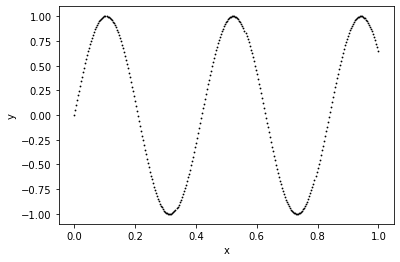

In [5]:
# Visualize the training data #
plt.figure()
plt.plot(X_train,Y_train,'ko', markersize = 0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__Our goal is to build a model to fit this data, in other words, we want to find a function $f$ that maps the input ($x$) into the output ($y$)__. 

## 3 - Neural Network Model

Here is an example of a neural network model


![NN_representation](./fully_connected.png)

__Basically, we are going to use a neural network to learn the appropriate parameters ($W$ and $b$) and features $a$ that provide a mapping of the input data $x$ to the output data $y$ that minimizes a loss function. Usually, this loss function measures the difference between the the predictions $\hat{y}$ and the desired output $y$.__ 


### Neural network notation

$L$ = number of layers 

$n^{[l]}$ = number of units in layer $l$ (For example, the input layer $l = 0$ and the output layer $l = L$)  

$\mathbf{W}^{[l]}$ = Weight matrix for layer $l$

$\mathbf{b}^{[l]}$ = Bias vector for layer $l$

### 3.1 - Initializing the model parameters

We need to initialize the parameters ($\mathbf{W^{[1]}}$, $\mathbf{W^{[2]}}$, $\mathbf{b^{[1]}}$, $\mathbf{b^{[2]}}$ ) of our model.
 - Define the weights matrices and bias vector sizes
  - The matrix $\mathbf{W}^{[l]}$ is of size $n^{[l+1]} \times n^{[l]}$ 
  - The vector $\mathbf{b}^{[l]}$ is of size $n^{[l+1]} \times 1$
 - We will initialize the weights matrices using Xavier's initialization 
  -  $\mathbf{W}^{[l]}$ = random($n^{[l+1]}$,$n^{[l]}$)$\sqrt{ \left( \frac{6}{n^{[l]} + n^{[l+1]}}  \right)}$
 - We will initialize the bias vectors as zeros
  - $\mathbf{b}^{[l]}$ = zeros($n^{[l+1]},1$)

In [6]:
def initialize_parameters(nn_structure):

    parameters = {} # python dictionary containing the parameters
    
    L = len(nn_structure) - 1 # Number of layers
    
    for l in range(L):
        parameters['W' + str(l+1)] = np.random.randn(nn_structure[l+1],nn_structure[l])*np.sqrt(6.0/(nn_structure[l] + nn_structure[l+1]))
        parameters['b' + str(l+1)] = np.zeros((nn_structure[l+1],1))
        
    return parameters

In [7]:
parameters_test = initialize_parameters([1,6,1])

print("W1 = " + str(parameters_test["W1"]))
print("b1 = " + str(parameters_test["b1"]))
print("W2 = " + str(parameters_test["W2"]))
print("b2 = " + str(parameters_test["b2"]))

W1 = [[ 1.17318414]
 [-0.22423431]
 [-0.42435035]
 [ 0.86522675]
 [-0.73970761]
 [ 0.15562861]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.05472189  0.300916   -0.96955949  0.69483226  0.57176187  0.31328543]]
b2 = [[0.]]


### 3.2 - Forward propagation step

Now that we have initialized the parameters, we can perform the forward propagation step as shown in section 3. 

For all layers $l$:
\begin{equation*}
\mathbf{A}^{[0]} = \mathbf{X} \\
\mathbf{Z}^{[l]} = \mathbf{W}^{[l]} \mathbf{A}^{[l-1]} + \mathbf{b}^{[l]} \\
\mathbf{A}^{[l]} = \sigma(\mathbf{Z}^{[l]}) 
\end{equation*}




where $\sigma$ is the activation function and $\mathbf{X}$ is the input matrix of size $n^{[0]} \times m$. There are several available activation functions
such as sigmoid, hyperbolic tangent (tanh), rectified linear unit (ReLU), exponential linear unit (ELU)
to name a few. In this notebook, we use $\tanh$ as the activation function. Usually for regression problems, the activation function for the last layer is the identity function $f(z) = z.$

In [8]:
print(parameters_test)
L = len(parameters_test)//2 # Number of layers
print(L)
Z = {} # Linear function 
A = {} # Activation function
A[str(0)] = X_train # Inicializing the method A[0] = X_train
#print(A)
l = 0
W = parameters_test["W" + str(l+1)] # Weights W
b = parameters_test["b" + str(l+1)] # Biases b
M = np.dot(W,A[str(l)]) + b # Compute the linear operation 
N = np.tanh(M) # Compute the non linear operation
print(M.shape)
print(N.shape)

{'W1': array([[ 1.17318414],
       [-0.22423431],
       [-0.42435035],
       [ 0.86522675],
       [-0.73970761],
       [ 0.15562861]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.05472189,  0.300916  , -0.96955949,  0.69483226,  0.57176187,
         0.31328543]]), 'b2': array([[0.]])}
2
(6, 301)
(6, 301)


In [9]:
def forward_propagation(parameters,X):
    
    L = len(parameters)//2 # Number of layers
    Z = {} # Linear function 
    A = {} # Activation function
    A[str(0)] = X # Inicializing the method A[0] = X_train
    
    for l in range(L):
        W = parameters["W" + str(l+1)] # Weights W
        b = parameters["b" + str(l+1)] # Biases b
        Z[str(l+1)] = np.dot(W,A[str(l)]) + b # Compute the linear operation 
        A[str(l+1)] = np.tanh(Z[str(l+1)]) # Compute the non linear operation 
        
    Y_hat = Z[str(L)] # prediction
    
    return Y_hat,Z,A

In [10]:
Y_hat_test,Z_test,A_test = forward_propagation(parameters_test,X_train)
print(Y_hat_test.shape)

(1, 301)


### 3.3 - Computing the cost function

Given the predictions on all the training examples, we can compute the cost function $J$ as follows:

\begin{equation*}
J = \frac{1}{2m} \sum\limits_{i=1}^{n^{[L]}} \sum\limits_{j=1}^{m}  (\hat{\mathbf{Y}}_{i,j} - \mathbf{Y}_{i,j})^2
\end{equation*}

Where $m$ is the number of training examples and $i$ is the i-th training example. The matrices $\mathbf{Y}$ and $\hat{\mathbf{Y}}$ have size of $n^{[L]} \times m$.

In [11]:
def cost_function(Y_hat,Y):
    
    m = X_train.shape[1]
    J = (1.0/(2.0*m))*(np.sum(np.square(Y_hat - Y)))
    
    return J

In [12]:
J = cost_function(Z_test['2'],Y_train)
print("cost = " + str(J))

cost = 0.27052294160671314


### 3.4 Backward propagation step

Gradients of the cost function with respect to each parameter are computed using back-progation. Using the chain rule, it is straightforward to write down algebraic expression for the gradients.

Example: Shallow Neural Network (One hidden layer)

\begin{equation*}
\text{Remember} \hspace 0.2cm  \mathbf{\hat{Y}} = A^{[2]} = Z^{[2]}
\end{equation*}

\begin{equation*}
L(\mathbf{A}^{[2]}, \mathbf{Y}) = \frac{1}{2m} (\mathbf{A}^{[2]} -  \mathbf{Y})^2
\tag{7}
\end{equation*}

\begin{equation*}
\delta\mathbf{A}^{[2]} = \frac{\partial L(\mathbf{A}^{[2]}, \mathbf{Y})}{\partial \mathbf{A}^{[2]}} = \frac{1}{m} (\mathbf{A}^{[2]} -  \mathbf{Y}) 
\tag{8}
\end{equation*}

\begin{equation*}
\delta\mathbf{Z}^{[2]} = \frac{\partial L}{\partial \mathbf{Z}^{[2]}} = \frac{\partial L}{\partial \mathbf{A}^{[2]}} \frac{\partial \mathbf{A}^{[2]}}{\underbrace{ \partial \mathbf{Z}^{[2]}}}_{\text{= 1}} = \frac{1}{m} (\mathbf{A}^{[2]} -  \mathbf{Y}) 
\tag{9}
\end{equation*}

\begin{equation*}
\text{Remember} \hspace 0.2cm \mathbf{Z}^{[2]} = \mathbf{W}^{[2]} \mathbf{A}^{[1]} + \mathbf{b}^{[2]}
\end{equation*}

\begin{equation*}
\delta\mathbf{W}^{[2]} = \frac{\partial L}{\partial \mathbf{W}^{[2]}} = \frac{\partial L}{\partial \mathbf{Z}^{[2]}} \frac{\partial \mathbf{Z}^{[2]}}{\partial \mathbf{W}^{[2]}} = \delta\mathbf{Z}^{[2]} \mathbf{A}^{[1]T}
\tag{10}
\end{equation*}

\begin{equation*}
\delta\mathbf{b}^{[2]} = \frac{\partial L}{\partial \mathbf{b}^{[2]}} = \frac{\partial L}{\partial \mathbf{Z}^{[2]}} \underbrace{\frac{\partial \mathbf{Z}^{[2]}}{\partial \mathbf{b}^{[2]}}}_{\text{= 1}}  = \delta\mathbf{Z}^{[2]} = \sum\limits_{i = 1}^{m}  \delta\mathbf{Z}^{[2](i)}
\tag{11}
\end{equation*}

\begin{equation*}
\delta\mathbf{A}^{[1]} = \frac{\partial L}{\partial \mathbf{A}^{[1]}} = \frac{\partial L}{\partial \mathbf{Z}^{[2]}} \frac{\partial \mathbf{Z}^{[2]}}{\partial \mathbf{A}^{[1]}} = \mathbf{W}^{[2]T} \delta\mathbf{Z}^{[2]}
\tag{12}
\end{equation*}

\begin{equation*}
\text{Remember} \hspace 0.2cm A^{[1]} = \sigma(\mathbf{Z}^{[1]})
\end{equation*}

\begin{equation*}
\delta\mathbf{Z}^{[1]} = \frac{\partial L}{\partial \mathbf{Z}^{[1]}} = \frac{\partial L}{\partial \mathbf{A}^{[1]}} \frac{\partial \mathbf{A}^{[1]}}{\partial \mathbf{Z}^{[1]}} = \delta\mathbf{A}^{[1]} \sigma'(\mathbf{Z}^{[1]})
\tag{13}
\end{equation*}

\begin{equation*}
\text{Remember} \hspace 0.2cm \mathbf{Z}^{[1]} = \mathbf{W}^{[1]} \mathbf{A}^{[0]} + \mathbf{b}^{[1]}
\end{equation*}

\begin{equation*}
\delta\mathbf{W}^{[1]} = \frac{\partial L}{\partial \mathbf{W}^{[1]}} = \frac{\partial L}{\partial \mathbf{Z}^{[1]}} \frac{\partial \mathbf{Z}^{[1]}}{\partial \mathbf{W}^{[1]}} = \delta\mathbf{Z}^{[1]} \mathbf{A}^{[0]T}
\tag{14}
\end{equation*}

\begin{equation*}
\delta\mathbf{b}^{[1]} = \frac{\partial L}{\partial \mathbf{b}^{[1]}} = \frac{\partial L}{\partial \mathbf{Z}^{[1]}} \frac{\partial \mathbf{Z}^{[1]}}{\partial \mathbf{b}^{[1]}} = \delta\mathbf{Z}^{[1]} = \sum\limits_{i = 1}^{m}  \delta\mathbf{Z}^{[1](i)}
\tag{15}
\end{equation*}

__General form__:

For the last layer $L$:
\begin{equation*}
\delta\mathbf{A}^{[L]} =  \frac{1}{m} (\hat{\mathbf{Y}} -  \mathbf{Y})  \\
\delta\mathbf{Z}^{[L]} = \delta\mathbf{A}^{[L]} \\
\delta\mathbf{W}^{[L]} = \delta\mathbf{Z}^{[L]} \cdot \mathbf{A}^{[L-1]T} \\
\delta\mathbf{b}^{[L]} = \sum\limits_{i = 1}^{m}  \delta\mathbf{Z}^{[L](i)} \\
\end{equation*}

For the remaining layers:
\begin{equation*}
\delta\mathbf{A}^{[l]} = \mathbf{W}^{[l+1]T} \cdot \delta\mathbf{Z}^{[l+1]} \\
\delta\mathbf{Z}^{[l]} = \delta\mathbf{A}^{[l]} * \sigma'(\mathbf{Z}^{[l]}) \\
\delta\mathbf{W}^{[l]} = \delta\mathbf{Z}^{[l]} \cdot \mathbf{A}^{[l-1]T} \\
\delta\mathbf{b}^{[l]} = \sum\limits_{i = 1}^{m}  \delta\mathbf{Z}^{[l](i)} \\
\end{equation*}


Where $\sigma'$ is the derivative of the activation function, if $\sigma = \tanh$ then $\sigma'(z) = 1 - \tanh^2 (z)$.  

In [13]:
def backward_propagation(parameters,Z,A,Y,Y_hat):

    m = Y.shape[1] # Number of training examples
    L = len(parameters)//2 # Number of layers
    
    dZ = {} # Derivatives of the linear function Z
    dW = {} # Derivatives of the weigths W 
    db = {} # Derivatives of the biases b
    dA = {} # Derivatives of the activation function A
    dZ[str(L)] = (1./m) * (Y_hat - Y)
    dW[str(L)] = np.dot(dZ[str(L)], A[str(L-1)].T)
    db[str(L)] = np.sum(dZ[str(L)], axis=1, keepdims = True)
    for l in range(L-1,0,-1):
        dA[str(l)] = np.dot(parameters["W" + str(l+1)].T, dZ[str(l+1)])
        dZ[str(l)] = np.multiply(dA[str(l)], 1.0 - np.square(np.tanh(Z[str(l)])))
        dW[str(l)] = np.dot(dZ[str(l)], A[str(l-1)].T)
        db[str(l)] = np.sum(dZ[str(l)], axis=1, keepdims = True)
        
    return dW,db

In [14]:
dW_test, db_test = backward_propagation(parameters_test,Z_test,A_test,Y_train,Y_hat_test)

### 3.5 - Update the parameters

We will update the parameters of the model, using gradient descent:

\begin{equation*}
\mathbf{W}^{[l]} = \mathbf{W}^{[l]} - \eta \ \delta\mathbf{W}^{[l]}
\end{equation*}

\begin{equation*}
\mathbf{b}^{[l]} = \mathbf{b}^{[l]} - \eta \ \delta\mathbf{b}^{[l]}
\end{equation*}

Where $\eta$ is the learning rate. 

In [15]:
def update_parameters(parameters,dW,db,learning_rate):
   
    L = len(parameters)//2 # Number of layers

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*dW[str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*db[str(l+1)]

    return parameters

In [16]:
parameters_test = update_parameters(parameters_test,dW_test,db_test,0.1)
print ("W1 = "+ str(parameters_test["W1"]))
print ("b1 = "+ str(parameters_test["b1"]))
print ("W2 = "+ str(parameters_test["W2"]))
print ("b2 = "+ str(parameters_test["b2"]))

W1 = [[ 1.17354056]
 [-0.22728151]
 [-0.414957  ]
 [ 0.8596788 ]
 [-0.74459394]
 [ 0.15242802]]
b1 = [[ 0.00031253]
 [-0.00353671]
 [ 0.0106611 ]
 [-0.00565245]
 [-0.00518439]
 [-0.00373125]]
W2 = [[-0.06516438  0.30321262 -0.96527599  0.68662335  0.57893288  0.31168679]]
b2 = [[-0.01205732]]


## 4 - Merge all functions into a model

We will build our neural network model by putting together all the building blocks 

In [17]:
def model(X_train, Y_train, nn_structure, num_iterations, learning_rate, print_cost=False):
    
    costs = [] # Keep track of the cost
    
    # Initialize parameters #
    parameters = initialize_parameters(nn_structure)
    
    # Loop #
    for i in range(num_iterations):
        
        # Forward propagation #
        Y_hat,Z,A = forward_propagation(parameters,X_train)
        
        # Cost function #
        cost = cost_function(Y_hat,Y_train)
            
        # Backward propagation #
        dW,db = backward_propagation(parameters,Z,A,Y_train,Y_hat)
        
        # Update parameters (Gradient descent) #
        parameters = update_parameters(parameters,dW,db,learning_rate)
        
        # Print the cost every 1000 iterations #
        if print_cost == True and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    return parameters, costs

In [74]:
# Hyperparameters #
nn_structure = [1,40,20,10,1] # Neural network structure
num_iterations = 40001 # Number of iterations 
learning_rate = 0.08 # Learning rate

For instance, nn_structure = [1,6,1] means that our neural network has a input layer with 1 node, a hidden layer with 6 nodes and a output layer with 1 node.

In [76]:
# Neural network model #
parameters, costs = model(X_train, Y_train, nn_structure, num_iterations, learning_rate, print_cost=True)

Cost after iteration 0: 0.411647
Cost after iteration 1000: 0.150658
Cost after iteration 2000: 0.001471
Cost after iteration 3000: 0.000854
Cost after iteration 4000: 0.000712
Cost after iteration 5000: 0.000643
Cost after iteration 6000: 0.000592
Cost after iteration 7000: 0.000547
Cost after iteration 8000: 0.000507
Cost after iteration 9000: 0.000470
Cost after iteration 10000: 0.000435
Cost after iteration 11000: 0.000402
Cost after iteration 12000: 0.000373
Cost after iteration 13000: 0.000345
Cost after iteration 14000: 0.000320
Cost after iteration 15000: 0.000298
Cost after iteration 16000: 0.000277
Cost after iteration 17000: 0.000258
Cost after iteration 18000: 0.000242
Cost after iteration 19000: 0.000226
Cost after iteration 20000: 0.000212
Cost after iteration 21000: 0.000200
Cost after iteration 22000: 0.000188
Cost after iteration 23000: 0.000177
Cost after iteration 24000: 0.000168
Cost after iteration 25000: 0.000159
Cost after iteration 26000: 0.000151
Cost after ite

### 5 - Predictions 

Now, we are going to use the model obtained by the neural network to predict $y$. Basically, we use forward propagation to predict results.

In [77]:
def predict(parameters,X):
    
    predictions,_,_ = forward_propagation(parameters,X_train)
    
    return predictions

In [78]:
# Make predictions #
predictions = predict(parameters,X_train)

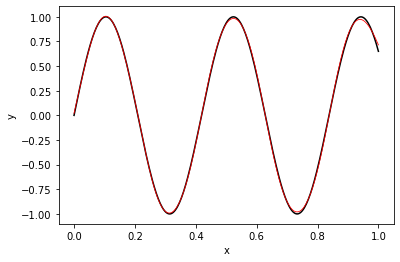

In [79]:
# Plot results #
X_train.shape
plt.figure()
plt.plot(X_train[0,:],Y_train[0,:],'k') # Training data
plt.plot(X_train[0,:],predictions[0,:],'r', lw = 0.8) # Predictions
plt.xlabel('x')
plt.ylabel('y')
plt.show()